In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
Lx = 0.01  
Ly = 0.01  
nx = 21  
ny = 21  
dx = Lx / (nx - 1)  
dy = Ly / (ny - 1)  

x = numpy.linspace(0.0,Lx,num=nx)
y = numpy.linspace(0.0,Ly,num=ny)
alpha = 1e-4

#initial conditions
T0 = numpy.full((nx,ny),20.0)
T0[0, :] = 100.0
T0[:, 0] = 100.0

In [3]:
def FTCS(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    ny ,nx =T.shape
    I , J =nx // 2, ny // 2
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
        #B.C.
        T[-1, :] = T[-2, :]
        T[:, -1] = T[:, -2]
        if T[J,I] >= 70:
            break
    print(n+1,T[J , I])
    return T

In [4]:
nt = 500
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha

T = FTCS(T0, nt, dt, dx, dy,alpha)

256 70.02138294076661


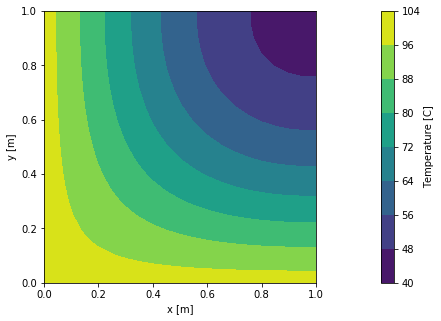

In [11]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x*100, y*100, T)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');

In [17]:
def btcs(T0,nt,dt,alpha,delta):
    sigma = alpha *dt /delta**2
    A = lhs_operator()
    T = map_2d_to_1d(T0)
    for n in range(nt):
        b = rhs.vector()
        T = numpy.linalg.slove(A,b)
    return map_1d_to_2d(T)    

In [18]:
def lhs_operator(M,N):
    A = numpy.zeros((M*N,M*N))
    for j in range(N):
        for i in range(M):
            I = j * M +i
            west = I-1
            east = I+1
            south = I - M
            north = I + M
            if i == 0 and j == 0:  # bottom-left corner
                A[I, I] = 1.0 / sigma + 4.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif i == M - 1 and j == 0:  # bottom-right corner
                A[I, I] = 1.0 / sigma + 3.0
                A[I, west] = -1.0
                A[I, north] = -1.0
            elif i == 0 and j == N - 1:  # top-left corner
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, east] = -1.0
            elif i == M - 1 and j == N - 1:  # top-right corner
                A[I, I] = 1.0 / sigma + 2.0
                A[I, south] = -1.0
                A[I, west] = -1.0
            # Setup coefficients at side points (excluding corners).
            elif i == 0:  # left side
                A[I, I] = 1.0 / sigma + 4.0
                A[I, south] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif i == M - 1:  # right side
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, north] = -1.0
            elif j == 0:  # bottom side
                A[I, I] = 1.0 / sigma + 4.0
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif j == N - 1:  # top side
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
            # Setup coefficients at interior points.
            else:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
    return A